In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

SOAP_CUTOFF = 10
pc_components = 3
fontsize = 18
skip = 20

In [2]:
soap_av = np.load(f"arrays/fullvect_SOAP_{SOAP_CUTOFF}.npy")
print(soap_av.shape)
SOAP=soap_av.reshape(np.shape(soap_av)[0]*np.shape(soap_av)[1],np.shape(soap_av)[2])
pca = PCA(n_components=pc_components)
pc_soap = pca.fit_transform(SOAP)
print(pca.explained_variance_ratio_)

(500, 2048, 576)
[0.85814304 0.06020431 0.04643032]


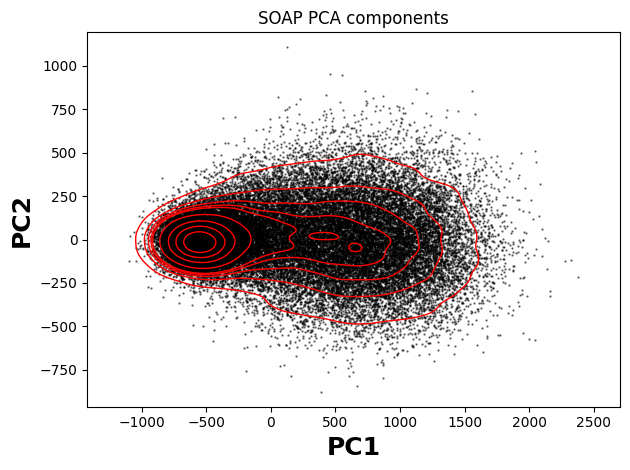

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# pc_soap = np.random.rand(1000, 2) # Sostituire con i propri dati
plt.scatter(pc_soap[::skip, 0], pc_soap[::skip, 1], s=0.5, color="black", alpha=0.5)

sns.kdeplot(x=pc_soap[::skip, 0], y=pc_soap[::skip, 1], levels=10, color="red", linewidths=1)

plt.title('SOAP PCA components')
plt.xlabel('PC1', fontweight='bold',fontsize=fontsize)
plt.ylabel('PC2', fontweight='bold',fontsize=fontsize)
plt.tight_layout()

plt.show()

In [4]:
soap_av = np.load(f"arrays/sp_10_SOAP_{int(SOAP_CUTOFF)}.npy")
soap_av = soap_av.transpose(2,1,0)
print(soap_av.shape)
SOAP=soap_av.reshape(np.shape(soap_av)[0]*np.shape(soap_av)[1],np.shape(soap_av)[2])
pca = PCA(n_components=pc_components)
pc_soap = pca.fit_transform(SOAP)
print(pca.explained_variance_ratio_)

(500, 2048, 576)
[0.99497686 0.00300169 0.00157842]


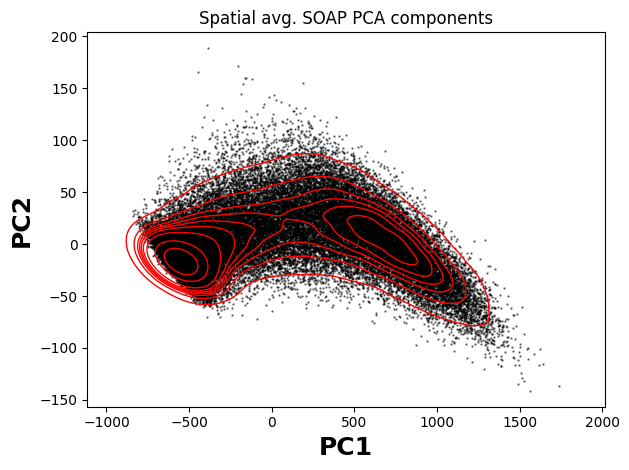

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.scatter(pc_soap[::skip, 0], pc_soap[::skip, 1], s=0.5, color="black", alpha=0.5)
sns.kdeplot(x=pc_soap[::skip, 0], y=pc_soap[::skip, 1], levels=10, color="red", linewidths=1)

plt.title('Spatial avg. SOAP PCA components')
plt.xlabel('PC1', fontweight='bold',fontsize=fontsize)
plt.ylabel('PC2', fontweight='bold',fontsize=fontsize)
plt.tight_layout()

plt.show()

In [6]:
soap_av = np.load(f"arrays/fullvect_SOAP_{SOAP_CUTOFF}.npy")
print(soap_av.shape)
SOAP=soap_av.reshape(np.shape(soap_av)[0]*np.shape(soap_av)[1],np.shape(soap_av)[2])
pca = PCA(n_components=pc_components)
pc_soap = pca.fit_transform(SOAP)
print(pca.explained_variance_ratio_)
ev = pca.explained_variance_ratio_

soap_av = np.load(f"arrays/sp_10_SOAP_{int(SOAP_CUTOFF)}.npy")
soap_av = soap_av.transpose(2,1,0)
print(soap_av.shape)
SOAP=soap_av.reshape(np.shape(soap_av)[0]*np.shape(soap_av)[1],np.shape(soap_av)[2])
pca = PCA(n_components=pc_components)
pc__soap = pca.fit_transform(SOAP)
print(pca.explained_variance_ratio_)
ev_10 = pca.explained_variance_ratio_

(500, 2048, 576)
[0.85814304 0.06020431 0.04643032]
(500, 2048, 576)
[0.99497686 0.00300169 0.00157842]


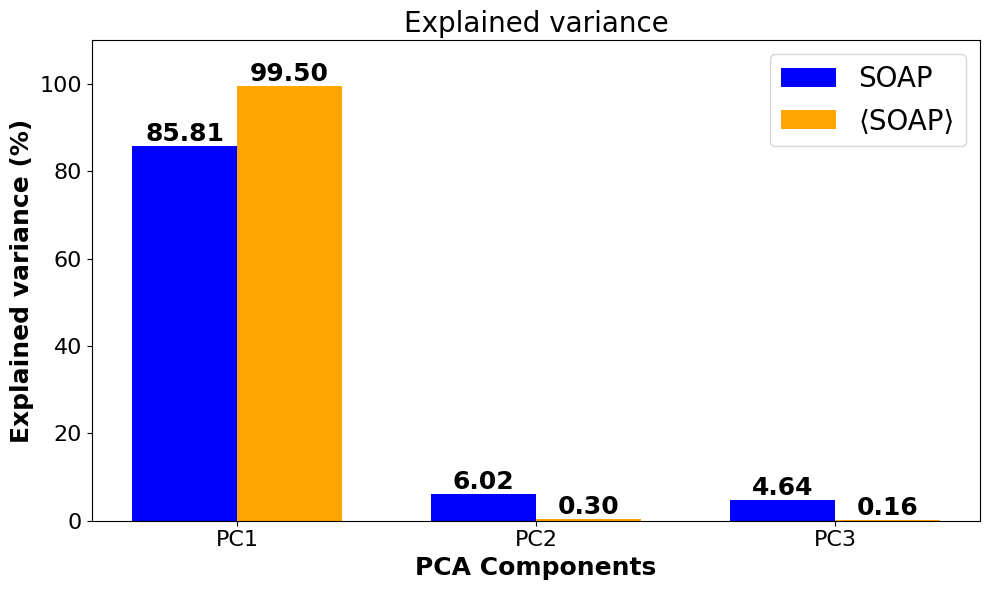

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

array1 = ev * 100
array2 = ev_10 * 100

labels = ['PC1', 'PC2', 'PC3']

x = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, array1, width, label='SOAP', color='blue')
bars2 = ax.bar(x + width/2, array2, width, label='⟨SOAP⟩', color='orange')

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}', va='bottom', ha='center', fontweight='bold',fontsize=fontsize)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}', va='bottom', ha='center', fontweight='bold',fontsize=fontsize)

ax.set_xlabel('PCA Components', fontweight='bold',fontsize=fontsize)
ax.set_ylabel('Explained variance (%)', fontweight='bold',fontsize=fontsize)
ax.set_title('Explained variance', fontsize=fontsize+2)
ax.set_xticks(x)
ax.set_xticklabels(labels)
lsize = 16
ax.set_ylim(0,110)
ax.tick_params(axis="x",labelsize=lsize)
ax.tick_params(axis="y",labelsize=lsize)
ax.legend(prop={'size': 20})
plt.tight_layout()
plt.show()